In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import qutip as qp
from IPython.display import Image

In [17]:
def rabi(omega, on_time, delta, init_time=0.0, 
            collapse=0.0*qp.sigmaz(), init_state=qp.Qobj([[0], [1]]), pi_pulse=0.5):
    H_free = -delta/2.0*qp.sigmaz()
    H_int = qp.sigmax()*omega/2.0 + H_free
    tlist = np.linspace(init_time, on_time, 1000)
    result = qp.mesolve(H_int, init_state, tlist, [collapse], [qp.basis(2,0)*qp.basis(2,0).dag()])
    return result
    
def ramsey(omega, tau, delta, init_time=0.0, init_state=qp.Qobj([[0], [1]]),
           collapse=0.0*qp.sigmaz(), on_time=None, res=100, N_sequences=1):
    if not on_time:
        on_time = np.pi/(omega*2)
    H_free = -delta/2.0*qp.sigmaz()
    H_int = qp.sigmax()*omega/2.0 + H_free

    results = []
    for i in range(N_sequences):
        tlist = np.linspace(init_time, init_time + on_time, res)
        tlist_2 = np.linspace(init_time + on_time, init_time + on_time + tau, res)
        tlist_3 = np.linspace(init_time + on_time + tau, init_time + 2*on_time + tau, res)
        final_time = init_time + 2*on_time + tau
        result1 = qp.mesolve(H_int, init_state, tlist, [collapse], [])
        result2 = qp.mesolve(H_free, result1.states[-1], tlist_2, [collapse], [])
        result3 = qp.mesolve(H_int, result2.states[-1], tlist_3, [collapse], [])
        init_time = final_time
        results.append([result1, result2, result3])

    return results

def repeated_ramsey(omega, tau, delta, long_delay, init_time=0.0, init_state=qp.Qobj([[0], [1]]),
           collapse=0.0*qp.sigmaz(), on_time=None, res=100, N_sequences=1):
    if not on_time:
        on_time = np.pi/(omega*2)
    H_free = -delta/2.0*qp.sigmaz()
    H_int = qp.sigmax()*omega/2.0 + H_free

    results = []
    for i in range(N_sequences):
        tlist = np.linspace(init_time, init_time + on_time, res)
        tlist_2 = np.linspace(init_time + on_time, init_time + on_time + tau, res)
        tlist_3 = np.linspace(init_time + on_time + tau, init_time + 2*on_time + tau, res)5

        tlist_4 = np.linspace(init_time + 2*on_time + tau, init_time + 2*on_time + tau + long_delay, res)
    
        new_init = init_time + 2*on_time + tau + long_delay
        
        tlist_5 = np.linspace(new_init, new_init + on_time, res)
        tlist_6 = np.linspace(new_init + on_time, new_init + on_time + tau, res)
        tlist_7 = np.linspace(new_init + on_time + tau, new_init + 2*on_time + tau, res)
    
        final_time = new_init + 2*on_time + tau
        
        result1 = qp.mesolve(H_int, init_state, tlist, [collapse], [])
        result2 = qp.mesolve(H_free, result1.states[-1], tlist_2, [collapse], [])
        result3 = qp.mesolve(H_int, result2.states[-1], tlist_3, [collapse], [])  
        result4 = qp.mesolve(H_free, result3.states[-1], tlist_4, [collapse], [])
        
        result5 = qp.mesolve(H_int, result4.states[-1], tlist_5, [collapse], [])
        result6 = qp.mesolve(H_free, result5.states[-1], tlist_6, [collapse], [])
        result7 = qp.mesolve(H_int, result6.states[-1], tlist_7, [collapse], [])

        init_time = final_time
        results.append([result1, result2, result3, result4, result5, result6, result7])

    return results

In [42]:
result = ramsey(omega=28e6, tau=1e-6, delta=0.0, collapse=0*qp.sigmaz())
plt.plot(result.expect[0])

AttributeError: 'list' object has no attribute 'expect'

In [19]:
detunings = np.linspace(-10*2*np.pi*80e6, 10*2*np.pi*80e6,300)
ree= []
for detuning in detunings:
    a, b, c = ramsey(omega=2.3e9, tau=12.5e-9, delta=detuning, on_time=0.01e-9, collapse=11210*qp.sigmax())
    ree.append(qp.expect(qp.basis(2,0)*qp.basis(2,0).dag(), c.states[-1]))
plt.plot(detunings, ree)
#plt.plot(a.times, qp.expect(qp.basis(2,0)*qp.basis(2,0).dag(), a.states))
#plt.plot(b.times, qp.expect(qp.basis(2,0)*qp.basis(2,0).dag(), b.states))
#plt.plot(c.times, qp.expect(qp.basis(2,0)*qp.basis(2,0).dag(), c.states))

ValueError: need more than 1 value to unpack

In [12]:
detunings = np.linspace(-10*2*np.pi*80e6, 10*2*np.pi*80e6,300)
ree= []
for detuning in detunings:
    a, b, c = ramsey(omega=2.3e9, tau=12.5e-9, delta=detuning, on_time=0.01e-9, collapse=11210*qp.sigmax())
    ree.append(qp.expect(qp.basis(2,0)*qp.basis(2,0).dag(), c.states[-1]))
plt.plot(detunings, ree)

ValueError: need more than 1 value to unpack

<IPython.core.display.Javascript object>


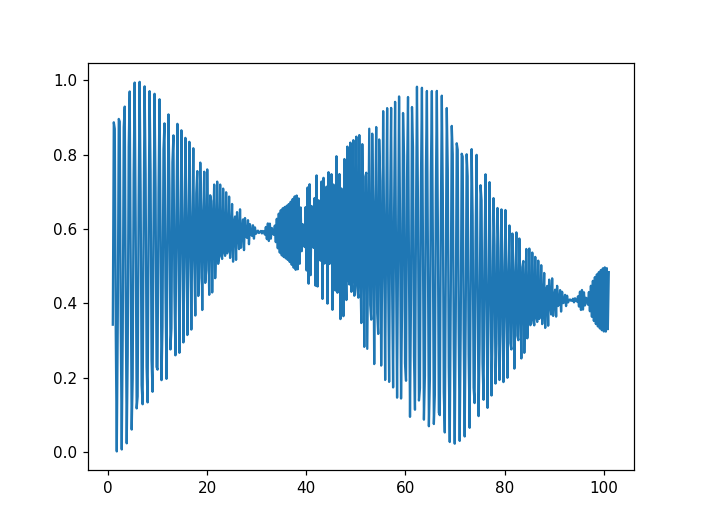

In [88]:
delay_center = 1.0
omega=1.0
big_delay = 1000.0
num_pulses=2
delays = np.linspace(delay_center, delay_center + 100.0,500)
ree1_pulse= []
init_state=qp.Qobj([[0], [1]])
for delay in delays:
    for pulse_set in range(num_pulses):
        results = ramsey(init_state=init_state , omega=omega, on_time= np.pi/(5*omega), tau=delay,
                         delta=0.1, collapse=0*qp.sigmaz(), N_sequences=1, res=500)
        new_init_state = results[0][2].states[-1]
        if pulse_set +1 != num_pulses:
            H_free = -0.1/2.0*qp.sigmaz()
            tlist = np.linspace(0.0, big_delay,500)
            final_result = qp.mesolve(H_free, new_init_state, tlist, [0*qp.sigmaz()], [])
            final_state = final_result.states[-1]
            init_state = final_state   
    ree1_pulse.append(qp.expect(qp.basis(2,0)*qp.basis(2,0).dag(), final_state))
plt.plot(delays, ree1_pulse)
#plt.legend()
#plt.xlabel('delay (attosecond)')
#plt.ylabel('Excited state probability for single event')

In [21]:
plt.show()

<IPython.core.display.Javascript object>


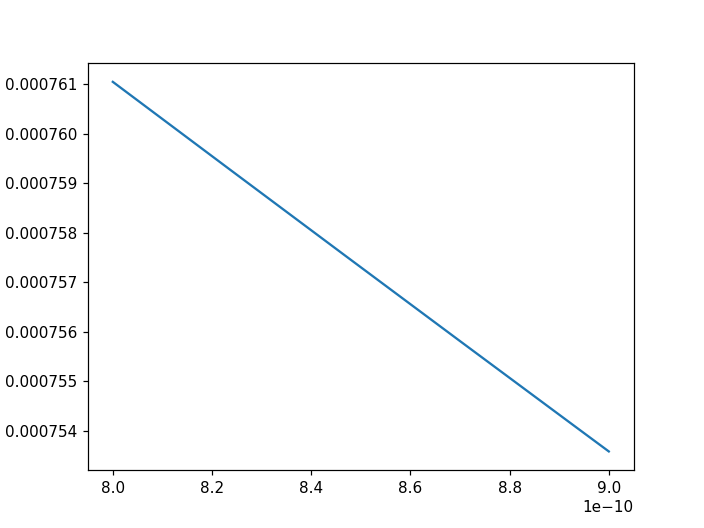

/home/qsimexpcontrol/.virtualenvs/labrad/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [22]:
delays = np.linspace(800e-12, 900e-12,300)
ree1_pulse= []
for delay in delays:
    results = repeated_ramsey(omega=2.789e9/np.sqrt(2), tau=delay, delta=1e6,
                        on_time=0.01e-9, collapse=11180*qp.sigmam(), N_sequences=1, res=10, long_delay=12.5e-9)
    ree1_pulse.append(qp.expect(qp.basis(2,0)*qp.basis(2,0).dag(), results[0][6].states[-1]))
plt.plot(delays, ree1_pulse)
plt.legend()

In [ ]:
plt.show()